<a href="https://colab.research.google.com/github/Renata-Romanelli/Challenge_Churn_rate/blob/main/Alura_Challenge_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alura Challenge - Data Science** 

Renata Romanelli 01/06/2022

E-mail: reromanelli.c@gmail.com

Github: https://github.com/Renata-Romanelli

## Week 3

Remembering the challenge...

You have been hired as a data scientist by the telecom operator Alura Voz. In the initial meeting with those responsible for the company's sales area, the entry of reducing the Customer Evasion Rate, known as Churn Rate, was explained. Basically, the Churn Rate indicates how much the company lost revenue or customers in a period of time.

With yours experience, you, as an initial step, identify customers that suggest a greater chance of leaving the company experience. For this, you explain that it is interesting to investigate customer characteristics or some customer plans to try to CLASSIFY these people as candidates to activate a company or not.

So you request the dataset to start exploring, treating and modeling from now on. Then, it will be in the optimization of each of the models in order to obtain the best result for Alura Voz's decision making.

## Previously done:
- Data cleaning and processing
- Data exploratory analysis
- Data visualization

In [1]:
# Load clean data

import pandas as pd

df = pd.read_csv('https://github.com/Renata-Romanelli/Challenge_Data_Science/blob/main/AluraVoz_Client_data_clean%20(1).csv?raw=true')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges_daily,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,2.19,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,2.00,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,2.46,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,3.27,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,2.80,Yes,Mailed check,83.9,267.40


In [2]:
df.drop(df[df.Churn == 'No information'].index, inplace=True)

# Hyphoteses

- Senior Citizen clients are more inlcined to leave the company.

- A great deal of clients that has 'Fiber Optic' as internet Service left the company. Fiber Optic internet is presenting functionality issues.

- The shorter the contract period, the higher is the churn rate. Clients who do not have a long term contract tend to have less commitment to the company. Likely due to a breach of contract fee.

- Cients that do not have online security has a higher Churn rate. Probably they have more problems with the internet service, due to its vounerabolity.

- Cients that do not have TechSupport has a higher Churn rate. Probably they have more problems unsolved with the internet service.

- Churn occurs most often in customers with little plan time, around 0 to 20 months of contract.

## Data Encoding 

In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'Charges_daily', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [ ]:

df_encoded = pd.get_dummies(data=df, columns=['InternetService'])
df_encoded = pd.get_dummies(data=df_encoded, columns=['Contract'])
df_encoded = pd.get_dummies(data=df_encoded, columns=['OnlineSecurity'])
df_encoded = pd.get_dummies(data=df_encoded, columns=['TechSupport'])
df_encoded = pd.get_dummies(data=df_encoded, columns=['SeniorCitizen'])
df_encoded.head()

,customerID,Churn,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,...,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,SeniorCitizen_No,SeniorCitizen_Yes
0,0002-ORFBO,No,Female,Yes,Yes,9,Yes,No,Yes,No,...,1,0,1,0,0,0,0,1,1,0
1,0003-MKNFE,No,Male,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
2,0004-TLHLJ,Yes,Male,No,No,4,Yes,No,No,Yes,...,0,0,1,0,0,1,0,0,1,0
3,0011-IGKFF,Yes,Male,Yes,No,13,Yes,No,Yes,Yes,...,0,0,1,0,0,1,0,0,0,1
4,0013-EXCHZ,Yes,Female,Yes,No,3,Yes,No,No,No,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
df_encoded = df_encoded.drop(['customerID', 'gender', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'OnlineBackup', 'DeviceProtection','StreamingTV', 'StreamingMovies',
       'Charges_daily', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'], axis=1)
df_encoded.head()

,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,SeniorCitizen_No,SeniorCitizen_Yes
0,No,1,0,0,0,1,0,1,0,0,0,0,1,1,0
1,No,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,Yes,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,Yes,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,Yes,0,1,0,1,0,0,1,0,0,0,0,1,0,1


In [ ]:
map = {
    'Yes':1,
    'No':0
}
df_encoded['Churn'] = df_encoded.Churn.map(map)
df_encoded.head()

,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,SeniorCitizen_No,SeniorCitizen_Yes
0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1


## Balancing Dataset

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED = 42

smote = SMOTE(random_state=42)

In [ ]:
x = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [ ]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [ ]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,SeniorCitizen_No,SeniorCitizen_Yes
0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1
10344,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1
10345,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0
10346,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

0    50.0
1    50.0
Name: Churn, dtype: float64


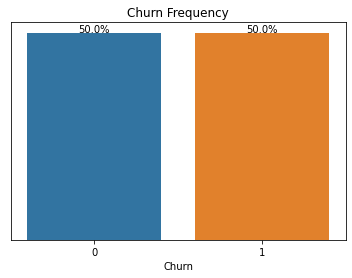

In [ ]:
Churn_frequency = df_balanced.Churn.value_counts(normalize=True)*100
print(Churn_frequency)

fig1 = sns.barplot(x=Churn_frequency.index, y=Churn_frequency.values)
fig1.set_ylabel('(%)')
fig1.set_xlabel('Churn')
fig1.set_title('Churn Frequency')
fig1.axes.get_yaxis().set_visible(False)

percentage = [Churn_frequency[0], Churn_frequency[1]]
patches = fig1.patches
for bar in range(len(patches)):
  x = patches[bar].get_x() + patches[bar].get_width()/2
  y = patches[bar].get_height() + .05
  fig1.annotate('{:.1f}%'.format(percentage[bar]), (x,y), ha='center')

# Machine Learning Models

## 1. Linear Regression

In [ ]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42 #garante a replicabilidade

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Accuracy: 0.7444916892153073
Precision: 0.7271375464684015
Recall: 0.7688679245283019
F1: 0.7474207107374857


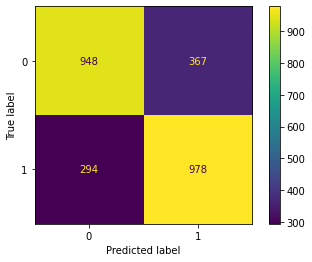

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

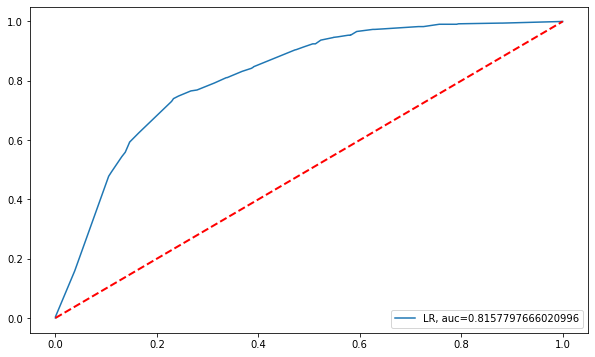

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ =  metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Accuracy: 0.7421724004638578
Precision: 0.7262528047868362
Recall: 0.7633647798742138
F1: 0.7443464929091607


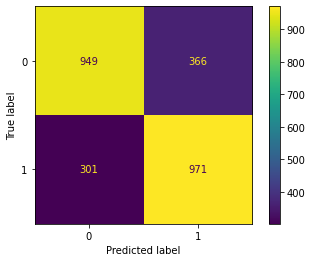

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

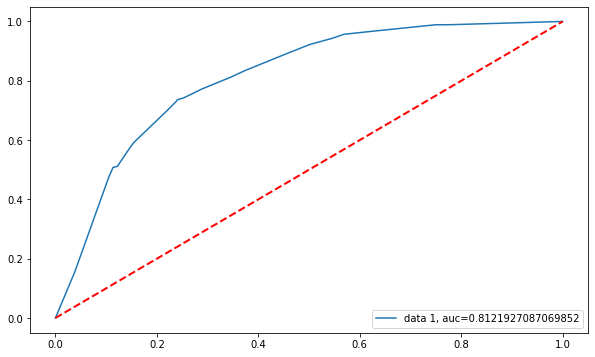

In [ ]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ =  metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=SEED)
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Accuracy: 0.7452647854657904
Precision: 0.7334348819497334
Recall: 0.7570754716981132
F1: 0.7450676982591875


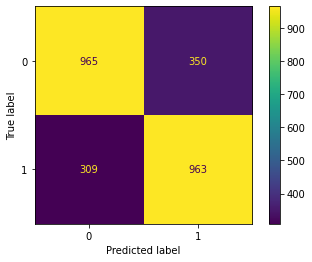

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

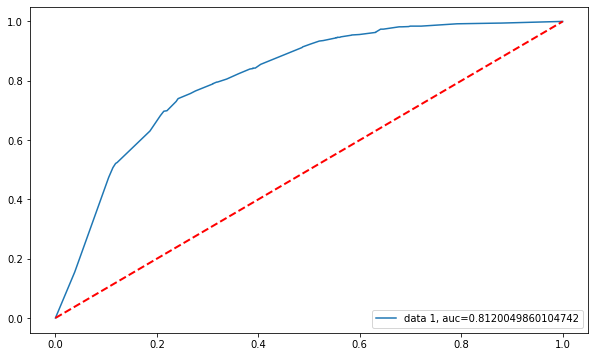

In [ ]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ =  metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

### Metrics analysis 

In [ ]:
classifiers = [
  LogisticRegression(max_iter=10, random_state=SEED),
  DecisionTreeClassifier(max_depth=5, random_state=SEED),
  RandomForestClassifier(max_depth=5, random_state=SEED)
]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression
****Resultados****
Accuracy: 0.7433320448395825
Precision: 0.7265275707898659
Recall: 0.7665094339622641
F1: 0.7459831675592962
DecisionTreeClassifier
****Resultados****
Accuracy: 0.7421724004638578
Precision: 0.7262528047868362
Recall: 0.7633647798742138
F1: 0.7443464929091607
RandomForestClassifier
****Resultados****
Accuracy: 0.7452647854657904
Precision: 0.7334348819497334
Recall: 0.7570754716981132
F1: 0.7450676982591875


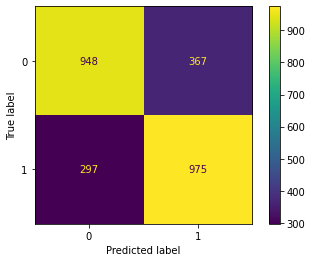

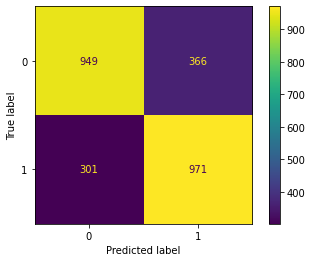

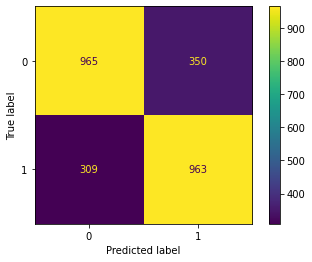

In [ ]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
  print('Precision:',metrics.precision_score(y_test, y_pred))
  print('Recall:',metrics.recall_score(y_test, y_pred))
  print('F1:',metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

# Improoving model **RandomForestClassifier** with **RandomizedSearchCV**

In [ ]:
n_estimators = np.arange(20, 200, step=20)
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
max_depth = list(np.arange(2,10, step=1))
min_samples_split = np.arange(2,10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
param_grid = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [ ]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring='recall', n_jobs=-1, random_state=SEED 
)

In [ ]:
%%time
rcv = random_cv.fit(x,y)

CPU times: user 390 ms, sys: 31.6 ms, total: 421 ms
Wall time: 4.66 s


In [ ]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.534206,0.010107,0.080804,0.001479,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.791304,0.763921,0.768116,0.774447,0.012042,4
1,0.363737,0.009272,0.061166,0.001924,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.813913,0.831206,0.813913,0.819678,0.008152,1
2,0.174442,0.004380,0.028205,0.000323,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.791304,0.765661,0.769275,0.775414,0.011333,3
3,0.452985,0.011043,0.067409,0.003909,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.765797,0.793503,0.761739,0.773680,0.014115,5
4,0.474954,0.002410,0.076483,0.018680,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.813913,0.831206,0.813913,0.819678,0.008152,1


In [ ]:
rcv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 120}

## Final Results

In [ ]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)
model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Accuracy: 0.7386934673366834
Precision: 0.7122507122507122
Recall: 0.7861635220125787
F1: 0.7473841554559043


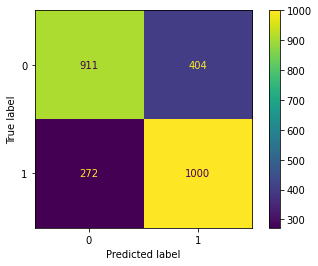

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Improoving model **Decision Tree Classifier** with **RandomizedSearchCV**

In [ ]:
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
max_depth = list(np.arange(2,10, step=1))
min_samples_split = np.arange(2,10, step=2)
min_samples_leaf = [1, 2, 4]

In [ ]:
param_grid = {
    'criterion':criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

dt_randomized = DecisionTreeClassifier(random_state=SEED)

In [ ]:
random_cv = RandomizedSearchCV(
    dt_randomized, param_grid, n_iter=5, cv=3, scoring='recall', n_jobs=-1, random_state=SEED 
)

In [ ]:
%%time
rcv = random_cv.fit(x,y)

CPU times: user 65.3 ms, sys: 3.5 ms, total: 68.8 ms
Wall time: 179 ms


In [ ]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004029,0.000126,0.008838,0.003775,6,4,auto,3,entropy,"{'min_samples_split': 6, 'min_samples_leaf': 4...",0.881739,0.719258,0.715362,0.772120,0.077529,2
1,0.013415,0.003258,0.011587,0.001864,6,4,log2,7,gini,"{'min_samples_split': 6, 'min_samples_leaf': 4...",0.795362,0.763341,0.766957,0.775220,0.014319,1
2,0.004223,0.000172,0.004244,0.001259,6,2,auto,5,gini,"{'min_samples_split': 6, 'min_samples_leaf': 2...",0.763478,0.774362,0.760580,0.766140,0.005933,4
3,0.004827,0.001784,0.008214,0.003286,2,2,log2,2,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.725217,0.725058,0.655652,0.701976,0.032756,5
4,0.004083,0.000299,0.003660,0.000078,8,4,sqrt,3,gini,"{'min_samples_split': 8, 'min_samples_leaf': 4...",0.881739,0.719258,0.715362,0.772120,0.077529,2


In [ ]:
rcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [ ]:
dtn = DecisionTreeClassifier(**rcv.best_params_, random_state=SEED)
model = dtn.fit(x_train, y_train)
y_pred = dtn.predict(x_test)

print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Accuracy: 0.7441051410900658
Precision: 0.7293233082706767
Recall: 0.7625786163522013
F1: 0.7455803228285933


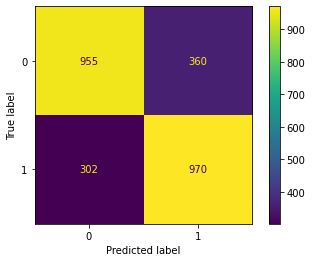

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()